### PLS에서의 component는 PCR와 다르게 X의 정보만을 이용하는 것이 아니라 반응변수와의 상관성을 고려하여 도출

In [1]:
install.packages('pls')

package 'pls' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\15U560\AppData\Local\Temp\Rtmpk9WcYu\downloaded_packages


In [2]:
library(pls)


Attaching package: 'pls'

The following object is masked from 'package:stats':

    loadings



In [3]:
data(gasoline)
?gasoline

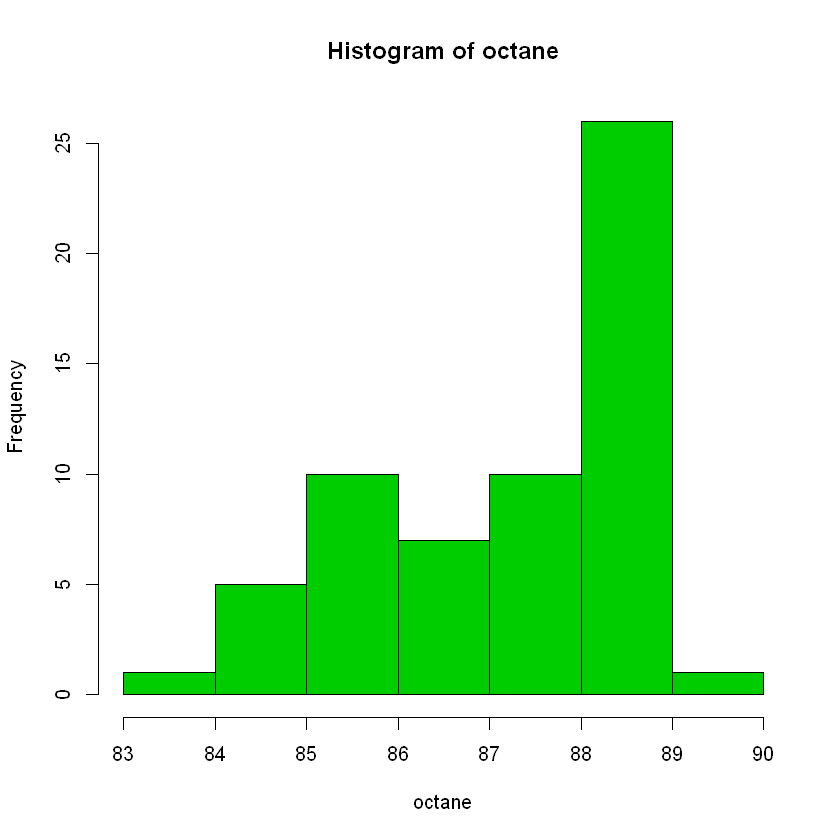

In [5]:
attach(gasoline)
hist(octane, col=3)

In [13]:
summary(octane)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  83.40   85.88   87.75   87.18   88.45   89.60 

In [14]:
str(gasoline)

'data.frame':	60 obs. of  2 variables:
 $ octane: num  85.3 85.2 88.5 83.4 87.9 ...
 $ NIR   : AsIs [1:60, 1:401] -0.0502 -0.0442 -0.0469 -0.0467 -0.0509 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr  "1" "2" "3" "4" ...
  .. ..$ : chr  "900 nm" "902 nm" "904 nm" "906 nm" ...


In [11]:
set.seed(123)
N <- nrow(gasoline)
tr.idx <- sample(1:N, N*2/3, replace = T)
gasTrain <- gasoline[tr.idx,]
gasTest <- gasoline[-tr.idx,]

In [16]:
ga.pca <- prcomp(gasoline$NIR, center=T, scale= F)
summary(ga.pca)

Importance of components:
                          PC1     PC2     PC3     PC4     PC5     PC6     PC7
Standard deviation     0.2101 0.08306 0.06505 0.05291 0.02747 0.02426 0.01734
Proportion of Variance 0.7257 0.11338 0.06954 0.04600 0.01240 0.00967 0.00494
Cumulative Proportion  0.7257 0.83903 0.90857 0.95457 0.96698 0.97664 0.98158
                           PC8     PC9    PC10    PC11     PC12    PC13
Standard deviation     0.01485 0.01422 0.01189 0.01106 0.008421 0.00819
Proportion of Variance 0.00363 0.00332 0.00232 0.00201 0.001170 0.00110
Cumulative Proportion  0.98521 0.98853 0.99085 0.99286 0.994030 0.99513
                           PC14     PC15     PC16     PC17     PC18    PC19
Standard deviation     0.007475 0.006568 0.005965 0.005888 0.005367 0.00397
Proportion of Variance 0.000920 0.000710 0.000580 0.000570 0.000470 0.00026
Cumulative Proportion  0.996050 0.996760 0.997340 0.997910 0.998380 0.99864
                           PC20     PC21     PC22    PC23     PC24    

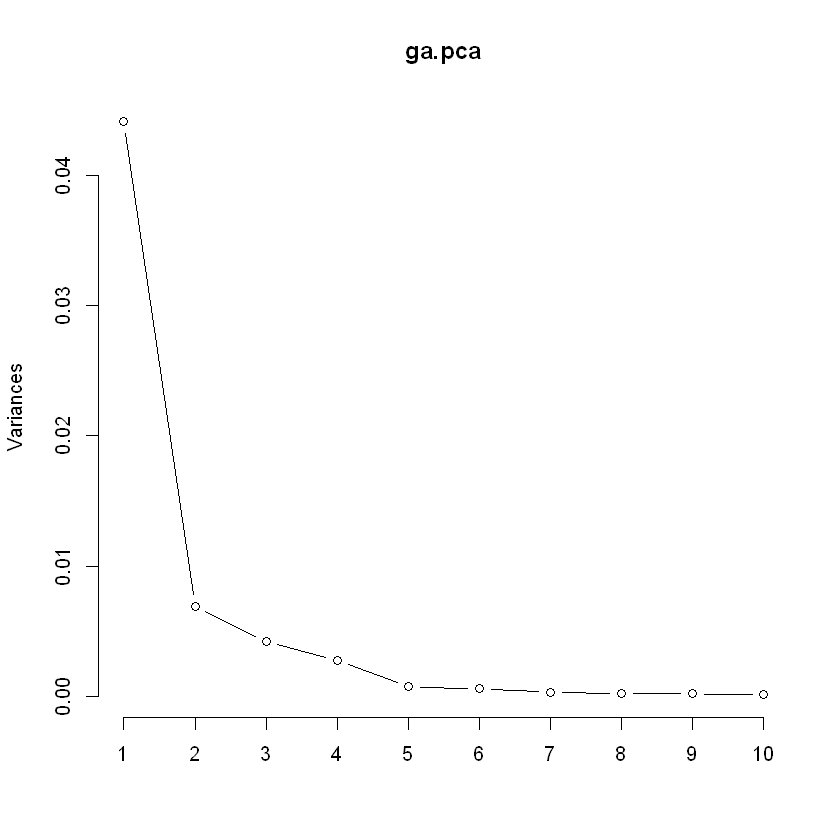

In [17]:
plot(ga.pca, type='l')

### 최소 5개정도의 PC는 사용

In [18]:
gas1 <- plsr(octane ~ NIR, ncomp=10, data= gasTrain, validation= 'LOO')
summary(gas1)

Data: 	X dimension: 40 401 
	Y dimension: 40 1
Fit method: kernelpls
Number of components considered: 10

VALIDATION: RMSEP
Cross-validated using 40 leave-one-out segments.
       (Intercept)  1 comps  2 comps  3 comps  4 comps  5 comps  6 comps
CV            1.55    1.297   0.8533   0.2076   0.1972   0.1617   0.1665
adjCV         1.55    1.298   0.8525   0.2064   0.1987   0.1613   0.1658
       7 comps  8 comps  9 comps  10 comps
CV      0.1639   0.1573   0.1665    0.1879
adjCV   0.1630   0.1565   0.1655    0.1862

TRAINING: % variance explained
        1 comps  2 comps  3 comps  4 comps  5 comps  6 comps  7 comps  8 comps
X         57.11    86.94    92.53    96.68    97.61    98.10    98.52    98.80
octane    36.85    74.98    98.52    98.84    99.30    99.49    99.60    99.68
        9 comps  10 comps
X         99.10     99.26
octane    99.73     99.81


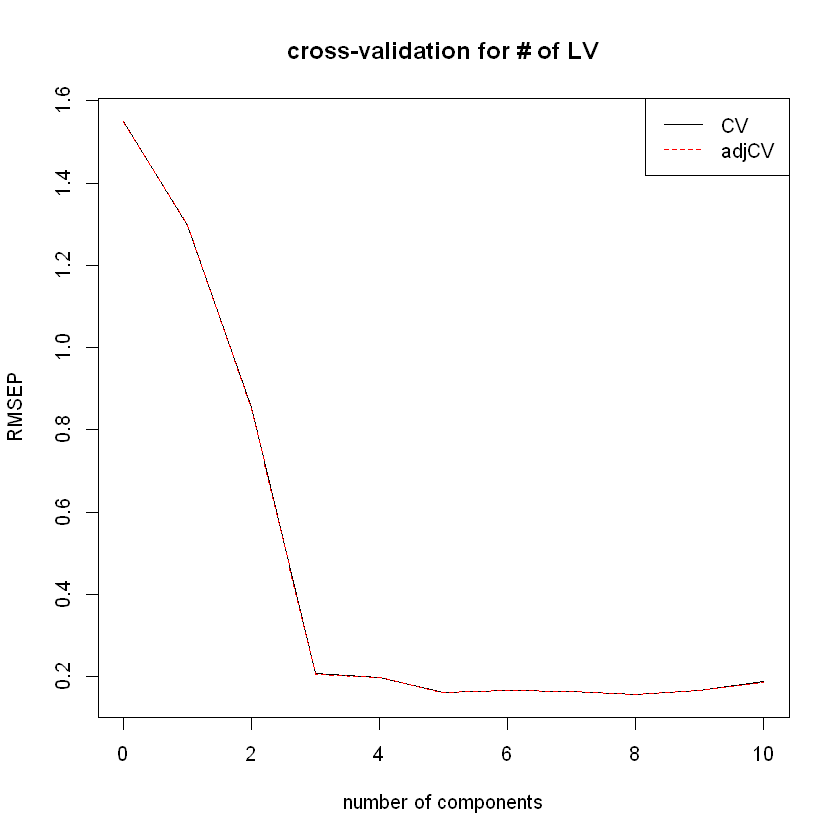

In [20]:
plot(RMSEP(gas1), legendpos= 'topright', pch=46, cex= 1.0, main= 'cross-validation for # of LV')

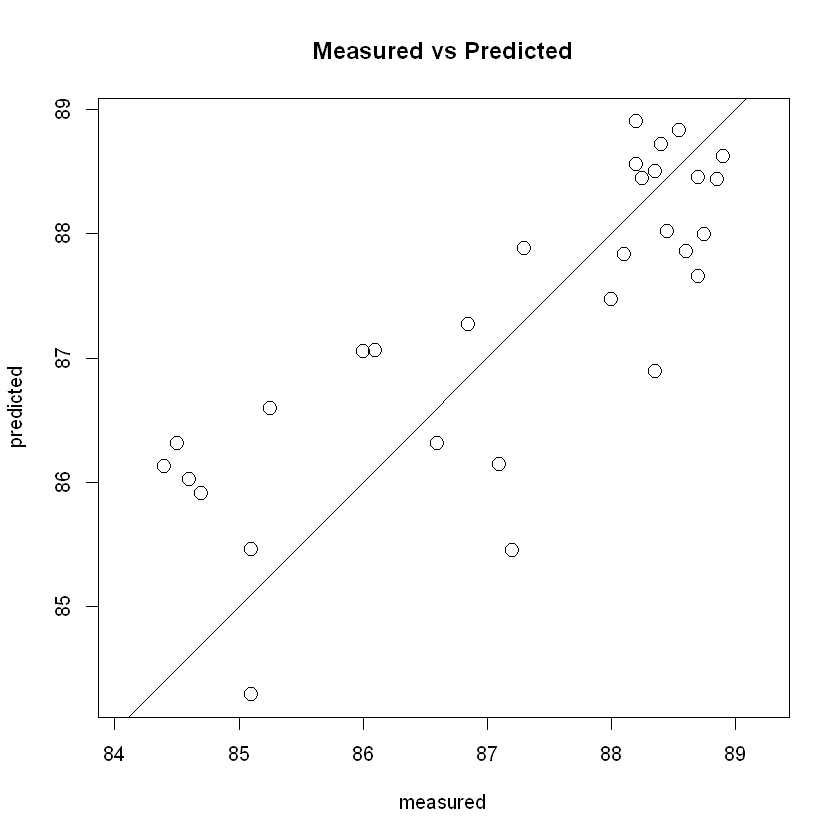

In [21]:
plot(gas1, ncomp= 2, asp= 1, line= T, cex= 1.5, main='Measured vs Predicted')

#### 실제값과 예측값의 차이가 있다고 판단됨

#### 잠재변수 수에 따른 전체분산의 설명정도

In [22]:
explvar(gas1)

Comp 1     Comp 2     Comp 3     Comp 4     Comp 5     Comp 6     Comp 7 
57.1062511 29.8302509  5.5973218  4.1479498  0.9280976  0.4930753  0.4206085 
    Comp 8     Comp 9    Comp 10 
 0.2761963  0.2997773  0.1641401

In [23]:
RMSEP(gas1, newdata= gasTest)

(Intercept)      1 comps      2 comps      3 comps      4 comps      5 comps  
     1.5032       1.1464       1.0803       0.3237       0.3184       0.3082  
    6 comps      7 comps      8 comps      9 comps     10 comps  
     0.2842       0.2929       0.2893       0.2944       0.3515  